### Deep learning overview 

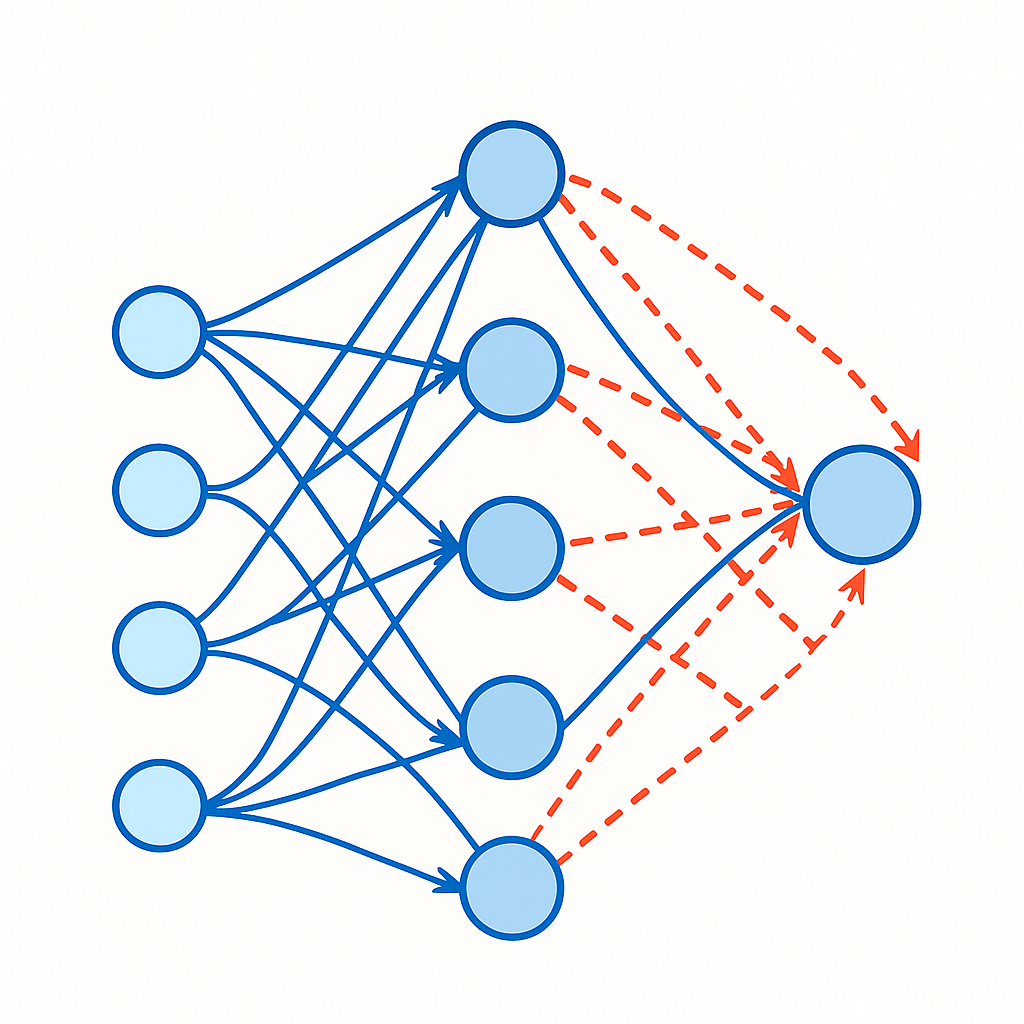

#### 1. Deep learning at it's very crux is just layers of matrix multiplication. 

Suppose we want to create a linear model , in that case our model would be something like 

Z = WX+B 

but not all realtions are linear and sometimes we need to find non-linear relationship , that is why we add activation functions , the activation functions help us to learn non-linear relationships , a good intuition would if we use linear model , we learn only models which are straight like like - but sometimes we want our model to have curves , in that case we use activation functions so that we can learn relations like ~ . 

Suppose we don't use activation functions and in each neuron we just do our model predict , in that case the output at the last layer would be something like 

Z = W1X+B1
Z1 = W2( W1X + B1)+B2 = W2Wx + W2B + B2 
Z2 = W3( W2W1X + W2B1 + B2 )+ B3 = W3W2W1W1X + W3W2B1 + W3B2 + B3 

So Z2 is essentially a linear function. That is why we use activation functions so that it is not only linear 

Normally in the hidden layers we would use ReLU as the activation function because for half of the values it plateus out and for other half the gradient is one so gradient is there and learning wouldn't face diminishing or exploding gradient problems


#### 2. The training process of deep learning contains 3 main steps 
    
a. Forward propagation :- We predict based on our paramters the label and calculate the error using suitable loss function.
b. Gradient calculation :- We find the gradient of our parameters w , b wrt to the loss function to determine how much to change and which direction.
c. Backward propagation :- We update the parameters in the reverse order 
    
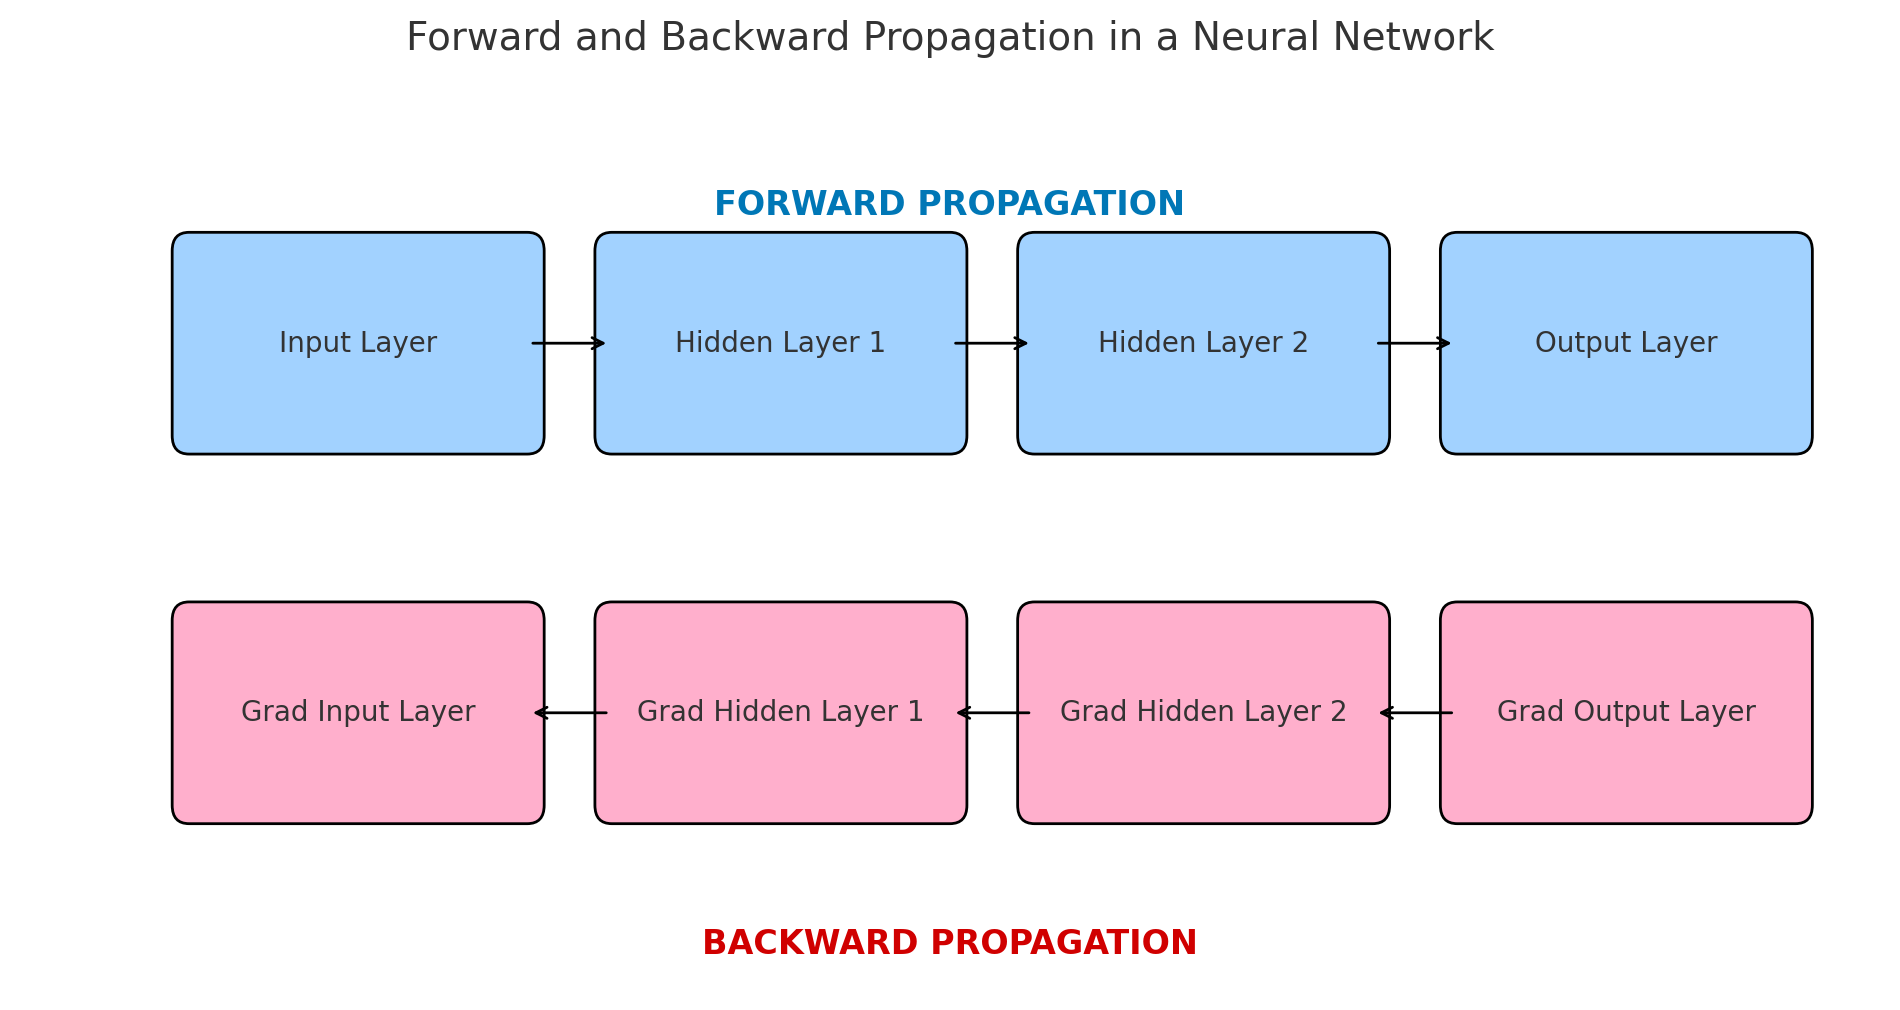

#### Hyperparameter tuning 


##### Tuning process 

Prioritise which hyper-parameters you tune

1. Learning rate (α) – always tune first.
2. Momentum β (or RMSProp/Adam β₁) and mini-batch size – adjust next for training-speed/runtime trade-offs.
3. Hidden-layer width (units per layer) – often worth a pass.
4. Number of layers and learning-rate decay schedule – useful but lower leverage.
5. Adam β₁, β₂, ε – almost always leave at 0.9 / 0.999 / 1 e-8.

Some knobs (α) change loss dramatically; others hardly move the needle. Focus time and GPU budget on the biggest levers first.

In high-dimensional spaces, only a small subset of hyper-parameters dominate performance. Random search lets you explore more distinct values for those dominant ones (e.g. α) instead of wasting trials on unimportant axes (e.g. ε). Sample N points uniformly at random in the hyper-parameter space rather than laying out a k × k × … grid.

Stage 1: Run a broad random sweep over wide ranges (log-scale for α, units, etc.).

Stage 2: Identify the “good” region, zoom in, and re-sample densely inside that narrower box.

Pick the hyper-parameter set that minimises dev-set error (or another chosen metric) rather than purely training loss.

Define ranges (often on log scale):

α ∈ [1e-4, 1] (log-uniform)

β ∈ [0.8, 0.99] (if using momentum)

Mini-batch size ∈ {32, 64, 128, 256}

Hidden units per layer ∈ [50, 1000]

Randomly sample 20-50 configurations → train/early-stop → keep top 5.

Zoom around the best α / batch-size / architecture with another 20-30 random trials.

Lock non-critical defaults (Adam β₁, β₂, ε) unless diagnostics prove they are an issue.

##### Scale for picking hyperparameters 

When you draw random hyper-parameter settings, the crucial trick is to sample each parameter on a scale that matches how sensitive your network is to that quantity. For small, discrete choices—say choosing the total number of layers (2, 3, 4) or picking hidden-unit counts in a tight band such as 50 – 100—ordinary uniform or grid sampling in that linear range is perfectly adequate because every option is “close” to every other and the model’s behaviour changes smoothly.

The story changes for continuous hyper-parameters that span several orders of magnitude. A learning rate that could plausibly sit anywhere between 1 × 10⁻⁴ and 1 makes a classic example: if you sample uniformly on the raw number line you squander about 90 % of your trials exploring the upper decade (0.1 – 1) while barely touching the tiny values that often work best.

The reason why 90% it is in upper decase is because uniform sampling can in principle produce any real number in the interval [0.0001, 1], but the chances of where a draw lands are proportional to the length of the sub-interval you care about.

| Decade      | Numeric span   | Length | Fraction of the whole interval |
| ----------- | -------------- | ------ | ------------------------------ |
| 10⁻⁴ → 10⁻³ | 0.0001 → 0.001 | 0.0009 | 0.09 %                         |
| 10⁻³ → 10⁻² | 0.001 → 0.01   | 0.009  | 0.9 %                          |
| 10⁻² → 10⁻¹ | 0.01  → 0.1    | 0.09   | 9 %                            |
| 10⁻¹ → 10⁰  | 0.1   → 1      | 0.9    | **90 %**                       |

The entire interval is 1 – 0.0001 ≈ 0.9999 in length. Because the uniform distribution puts equal density everywhere, the probability of landing in any slice is simply that slice’s length divided by 0.9999. Hence:

P(α between 0.1 and 1) ≈ 0.9 / 0.9999 ≈ 90 %

P(α between 0.001 and 0.01) ≈ 0.009 / 0.9999 ≈ 0.9 %

P(α between 0.0001 and 0.001) ≈ 0.0009 / 0.9999 ≈ 0.09 %


 Instead, convert the interval to log-space (log₁₀(1 × 10⁻⁴)= –4 up to log₁₀(1)= 0), draw a value r uniformly between –4 and 0, and set α = 10ʳ. That produces a “log-uniform” distribution, giving each decade an equal share of experiments.

Parameters whose natural value is very close to 1—momentum β or Adam’s β₁ and β₂—need an extra twist. What actually drives the algorithm is not β itself but the gap 1 – β: changing β from 0.9 to 0.9005 barely matters, whereas nudging β from 0.999 to 0.9995 doubles the effective averaging window. So sample r uniformly over the log₁₀ range of (1 – β), e.g. –3 to –1 if you want 1 – β between 10⁻³ and 10⁻¹, then set β = 1 – 10ʳ. 



In [ ]:
# Learning-rate between 1e-4 and 1
r = np.random.uniform(-4, 0)
alpha = 10 ** r          # 10^r ∈ [1e-4, 1]

# Momentum β between 0.9 and 0.999
r = np.random.uniform(-3, -1)  # for (1-β) ∈ [1e-3, 1e-1]
beta = 1 - 10 ** r

#### Batch Normalization ( Normalizing intermediate values in a neural network)

Batch normalization extends the familiar idea of feature-standardization to every hidden layer of a network: for each mini-batch it computes the mean and variance of the pre-activation values z in a layer, rescales them to zero mean and unit variance, then immediately re-shapes the result with two learnable parameters, γ (scale) and β (shift). This “normalize → re-affine” step ensures that each layer receives inputs whose distribution is well-behaved—whichever mean and variance γ and β decide are useful—so gradients propagate more smoothly, training becomes far less sensitive to the initial learning-rate or weight scale, and very deep architectures converge reliably. In effect, batch-norm gives every layer its own on-the-fly feature normalizer whose parameters are tuned by back-propagation, greatly widening the range of hyper-parameter settings that work and reducing the need for painstaking tuning.

Affine step is needed because batch-norm’s zero-mean, unit-variance rescaling is great for optimisation but overly restrictive for representation.
The learnable γ (scale) and β (shift) let the network undo or adjust that fixed standardisation, so each unit can still adopt whatever mean and spread best serve the task—ranging from fully cancelling the normalisation to pushing activations into ReLU-positive territory or sigmoid saturation when useful. Thus the affine step keeps the stabilising benefits while preserving the model’s full expressive power.

In practice, you insert batch-norm between the linear step and the non-linearity of every layer: compute Z = W · A_prev (no bias term, because BN will zero-centre the activations anyway), normalise the mini-batch’s Z to zero mean and unit variance, then apply the learnable affine transform Z̃ = γ · Ẑ + β, and finally feed Z̃ into the activation function to produce A. Each layer therefore gains two trainable vectors, γ and β (one scale and one shift per hidden unit), while the usual bias b is dropped. During training you repeat this for every mini-batch: forward-prop with the BN step, back-propagate to obtain gradients for W, γ, and β, and update them with your chosen optimiser (SGD, momentum, Adam, etc.)

Batch-normalization speeds training for three main reasons. 

First, it extends the familiar trick of zero-mean/unit-variance scaling from the raw inputs to every layer, so each layer always receives well-behaved values and gradients propagate smoothly. 

Second, by fixing the mean and variance of a layer’s pre-activations (up to the learnable γ, β shift/scale), it limits the “covariate shift” that deeper layers experience when earlier weights change; this decouples layers, letting each one learn on a more stable distribution. 

In a deep net each layer treats the activations from the layer before it as its “input features.” Every time back-prop updates an upstream weight matrix $W^{(l-1)}$, the distribution (mean, variance, correlations) of those activations $A^{(l-1)}$—and hence the pre-activations $Z^{(l)} = W^{(l)}A^{(l-1)}$—shifts. From the viewpoint of layer $l$ this feels exactly like an external *covariate shift*: the feature space it is trying to model has changed even though the underlying mapping from features to label hasn’t. As training progresses and early layers keep moving, deeper layers must constantly readjust to the new “feature” distribution; this slows convergence and can destabilize learning. Batch-normalization dampens that internal covariate shift by re-centring and re-scaling each mini-batch’s $Z^{(l)}$ to a fixed mean and variance, so later layers see a much steadier input distribution even while earlier weights are still evolving.

Batch-norm already kills the uncontrolled shift coming from all earlier weights; γ and β then re-introduce only a small, purposeful shift that is co-optimised with the next layer. We keep this affine step because a network without it would be needlessly strait-jacketed.

In short, γ and β are not there to cause variation but to give the model a painless way to choose whatever distribution it finds useful while BN keeps the optimisation landscape smooth. The minimal extra covariate shift they introduce is tiny, predictable, and already accounted for in the same gradient step


Third, because the mean / variance are estimated from each mini-batch, the normalization injects small, data-dependent noise into activations, acting as a mild, incidental regularizer (the effect shrinks with larger batch sizes).


During training, batch-norm normalises each layer’s pre-activations with the **mean (μ)** and **variance (σ²)** computed **over the current mini-batch**, but at inference you often have only one example at a time, so those batch statistics are unavailable.  The workaround is to maintain, for every BN layer, an **exponentially weighted running average** of the μ and σ² values observed across all training mini-batches; these “population” estimates are updated alongside the network’s weights during training and then frozen.  At test time each new example is scaled with this stored μ and σ² and the learned γ, β parameters, giving a stable, deterministic transformation without needing a full batch.  Any reasonable scheme for accumulating these running averages works well, and most deep-learning frameworks handle it automatically.


### Softmax Regression
Soft-max regression is the multi-class extension of logistic regression: the network’s final layer produces a vector $z^{(L)}$ (one logit per class), then applies the **soft-max activation**

$$
\tilde z_i = \frac{e^{z_i}}{\sum_{j=0}^{C-1} e^{z_j}}\;\;\;(\text{for } i=0,\dots,C-1),
$$

yielding a probability distribution $\hat y$ whose $C$ components are non-negative and sum to 1.  Thus the last layer has $C$ units (one per class—e.g. “other”, “cat”, “dog”, “chick”) and its output vector gives $p(y=\text{class }i\mid x)$.  With no hidden layers this model is equivalent to fitting $C$ linear classifiers whose decision boundaries are pairwise linear; adding hidden layers allows the same soft-max head to carve out complex non-linear regions for many classes.

* **Output layer** – For $C$ classes the network’s final layer produces a logit vector $z^{(L)}\in\mathbb R^{C}$.
  The soft-max activation converts this to a probability vector

  $$
  \hat y_i=\frac{e^{z_i}}{\sum_{j=0}^{C-1} e^{z_j}}\;,
  \qquad i=0,\dots ,C-1,
  $$

  so the largest logit yields the highest class probability.  (A “hard-max” would instead output a one-hot vector.)

* **Relation to logistic regression** – When $C=2$ the soft-max reduces to ordinary logistic regression; the two probabilities are redundant because they sum to 1.

* **Training objective** – Use the multi-class cross-entropy loss

  $$
  \ell(\hat y,y)= -\sum_{j=0}^{C-1} y_j\log\hat y_j,
  $$

  which, for a one-hot label $y$, simply penalises $-\log$ of the predicted probability assigned to the true class.
  The overall cost is the average of this loss over all training examples.

* **Back-prop starter** – For a single sample the gradient entering the soft-max layer is

  $$
  \frac{\partial\ell}{\partial z^{(L)}} = \hat y - y ,
  $$

  a $C$-dimensional vector that seeds standard back-prop; deep-learning libraries compute this automatically once the forward pass is specified.

* **Decision boundaries** – With no hidden layers the model forms piece-wise linear (hyper-plane) partitions of the input; adding hidden layers lets it carve complex non-linear regions while still using the same soft-max head.
